## 这是基于python的MLEM重建算法实践

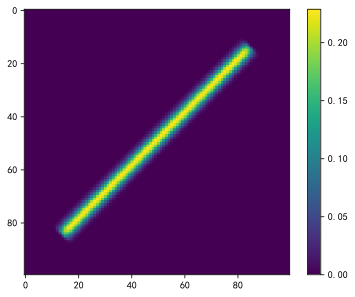

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import recon
import math

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体字
plt.rcParams['font.family']='sans-serif' 
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

with open('PSF2D_100x100x100x120.dat', 'rb') as f:
    data = np.array(np.fromfile(f, dtype=np.float32))

data=data.reshape(12000,10000)

fig, ax = plt.subplots()
cax = ax.imshow(data.reshape(120,100,100,100)[45,50], interpolation='nearest', cmap='viridis')
fig.colorbar(cax)
plt.show()
# 绘制系统矩阵的一个示例

使用[gen_phantom.py](./gen_phantom.py)生成一个测试图样。

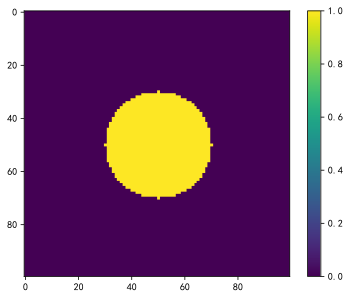

In [ ]:
with open('phantom.dat', 'rb') as f:
    phantom = np.array(np.fromfile(f, dtype=np.float32))
phantom=phantom.reshape(10000,1)

fig, ax = plt.subplots()
cax = ax.imshow(phantom.reshape(100,100), interpolation='nearest', cmap='viridis')
fig.colorbar(cax)
plt.show()
# 用来成像的图片

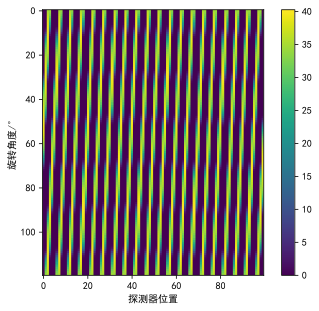

In [5]:
projection = data @ phantom
fig, ax = plt.subplots()
cax = ax.imshow(projection.reshape(100,120).T, interpolation='nearest', cmap='viridis')
fig.colorbar(cax)
ax.set_xlabel('探测器位置')
ax.set_ylabel('旋转角度/°')
plt.show()
# 计算sinogram

  0%|          | 0/20 [00:00<?, ?it/s]C:\Users\bjhvi\AppData\Local\Temp\ipykernel_28068\3374329927.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_likelyhood[_+1] = np.sum(data @ y) + np.sum(projection * np.log( data @ y)) -np.sum(np.log(math.gamma(projection[0]+1)))
100%|██████████| 20/20 [00:01<00:00, 12.19it/s]


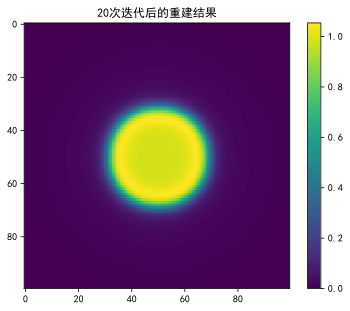

In [17]:
#MLEM
from tqdm import tqdm  

y = np.ones((10000,1),dtype=np.float32)
iter = 20; #迭代次数
log_likelyhood=np.ones(iter+1)
log_likelyhood[0]=0

for _ in tqdm(range(iter)):
    proj_y = data @ y
    y = y * ((data.T @ projection) / (data.T @ proj_y))
    log_likelyhood[_+1] = np.sum(data @ y) + np.sum(projection * np.log( data @ y)) -np.sum(np.log(math.gamma(projection[0]+1)))

fig, ax = plt.subplots()
cax = ax.imshow(y.reshape(100,100), interpolation='nearest', cmap='viridis')
fig.colorbar(cax)
ax.set_title(str(iter) + '次迭代后的重建结果')
plt.show()

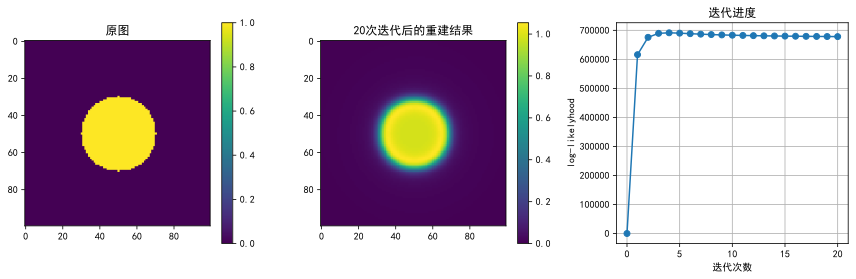

In [13]:
# 对比结果
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

cax0 = ax[0].imshow(phantom.reshape(100, 100), interpolation='nearest', cmap='viridis')
ax[0].set_title('原图')
fig.colorbar(cax0, ax=ax[0])

cax = ax[1].imshow(y.reshape(100, 100), interpolation='nearest', cmap='viridis')
ax[1].set_title(str(iter) + '次迭代后的重建结果')
fig.colorbar(cax, ax=ax[1])

# 绘制log-likelyhood
ax[2].plot(log_likelyhood, marker='o')
ax[2].set_title('迭代进度')
ax[2].set_xlabel('迭代次数')
ax[2].set_ylabel('log-likelyhood')
ax[2].grid(True)
plt.tight_layout()
plt.show()

将以上步骤打包为函数,测试不同的图样：

100%|██████████| 100/100 [00:06<00:00, 14.69it/s]


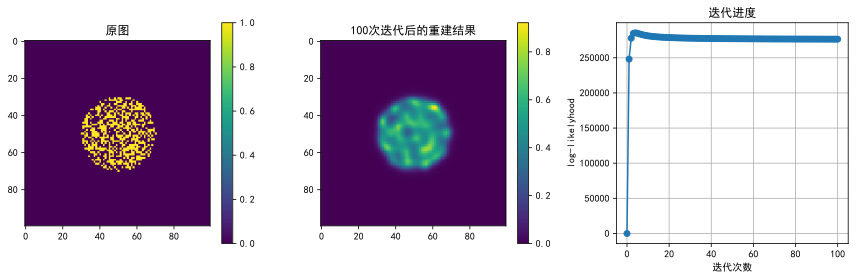

In [18]:
from recon import recon
recon(sysmatpath='PSF2D_100x100x100x120.dat',phantompath='phantom_random.dat',iter=100)